In [21]:
import pandas as pd
import numpy as np
import scanpy as sc
import umap

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [19]:
df = pd.read_csv('../luminalAB/mrna/trimmedTMM.csv')
logdf = pd.read_csv('../luminalAB/mrna/logTMM.csv')
scaled = pd.read_csv('../luminalAB/mrna/NormalizedlogTMM.csv')
meta = pd.read_csv('../luminalAB/mrna/lumAB_id_cancer.txt', sep='\t')
meta.ID = meta.ID.astype('category')
meta.ID.cat.set_categories(df.columns, inplace=True)
meta.sort_values("ID", inplace=True)
meta.head()

,ID,cancer
2,02bf5203-f9cd-4c5a-97b4-e5584dc22325,Luminal_A
3,02f5ae33-a563-4ecb-9e33-dfa500a44931,Luminal_A
5,035cb359-eac3-484a-9e88-3ddc739440a3,Luminal_A
7,0772cdbe-8b0d-452b-8df1-bd70d1306363,Luminal_A
8,0807435a-e75e-4e04-8e45-ed0cd49a841a,Luminal_A


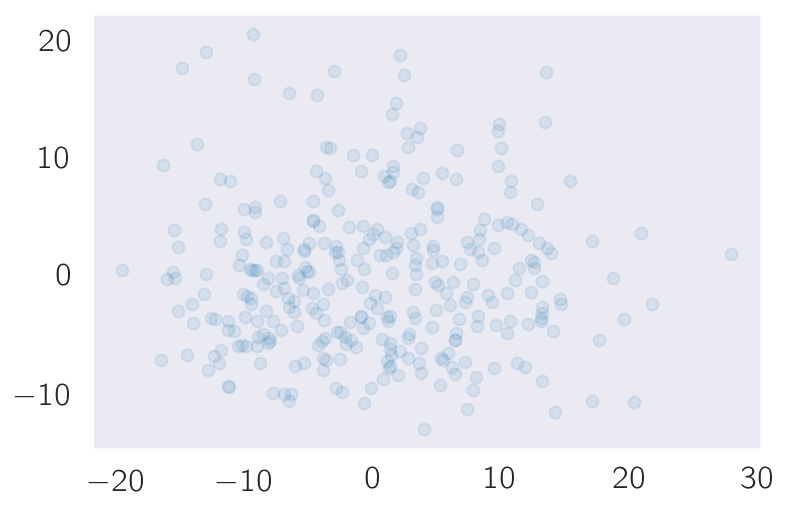

In [8]:
pca = PCA(2)
coords = pca.fit_transform(logdf.T)
pca.explained_variance_ratio_
plt.scatter(*coords.T, alpha=0.1)

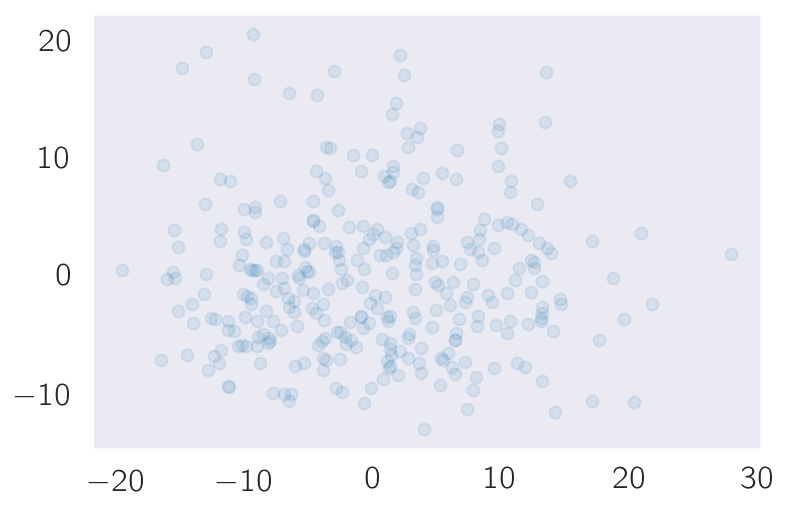

In [9]:
pca2 = PCA(2)
coords2 = pca2.fit_transform(scaled.T)
pca2.explained_variance_ratio_
plt.scatter(*coords.T, alpha=0.1)

In [12]:
nmf = NMF(2,
          alpha=0.3, l1_ratio=0.3,
          max_iter=10000, solver='cd')
H = nmf.fit_transform(logdf)

/Users/davidangeles/opt/anaconda3/envs/scanpy/lib/python3.6/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/davidangeles/opt/anaconda3/envs/scanpy/lib/python3.6/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


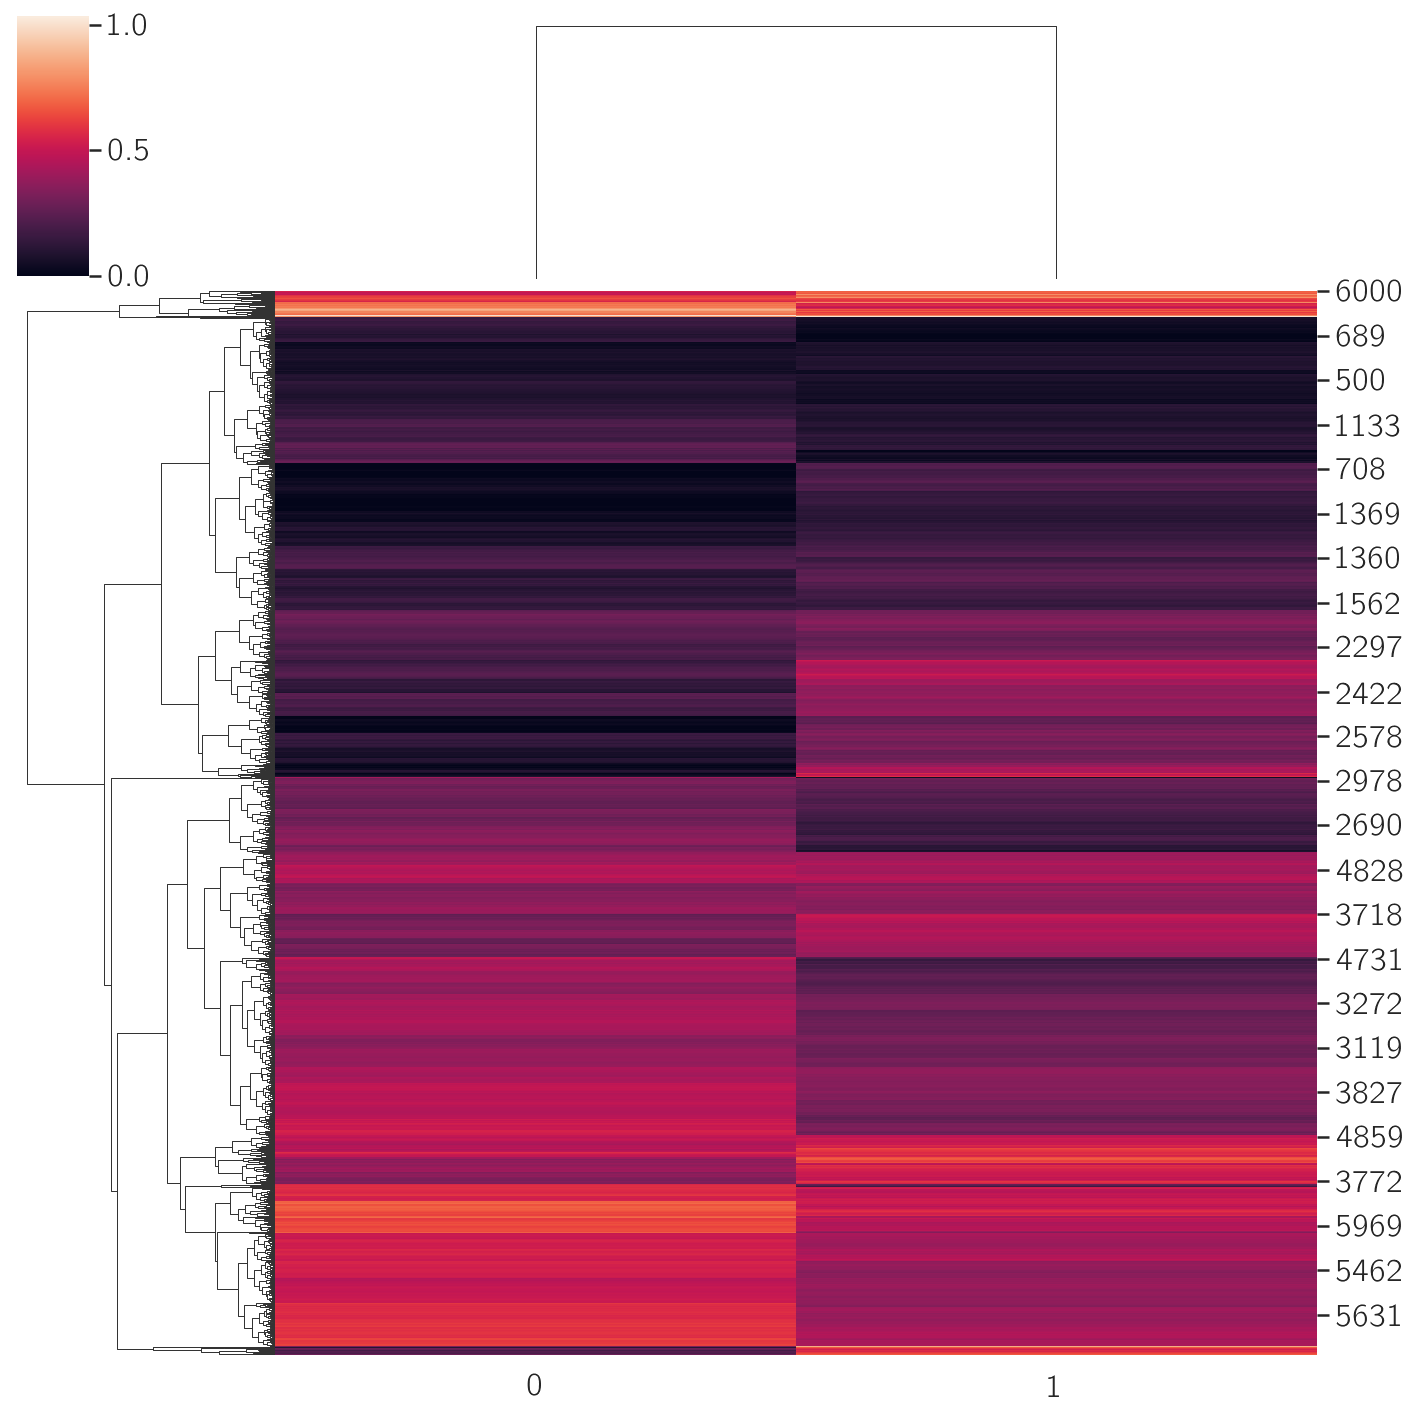

In [13]:
sns.clustermap(H)

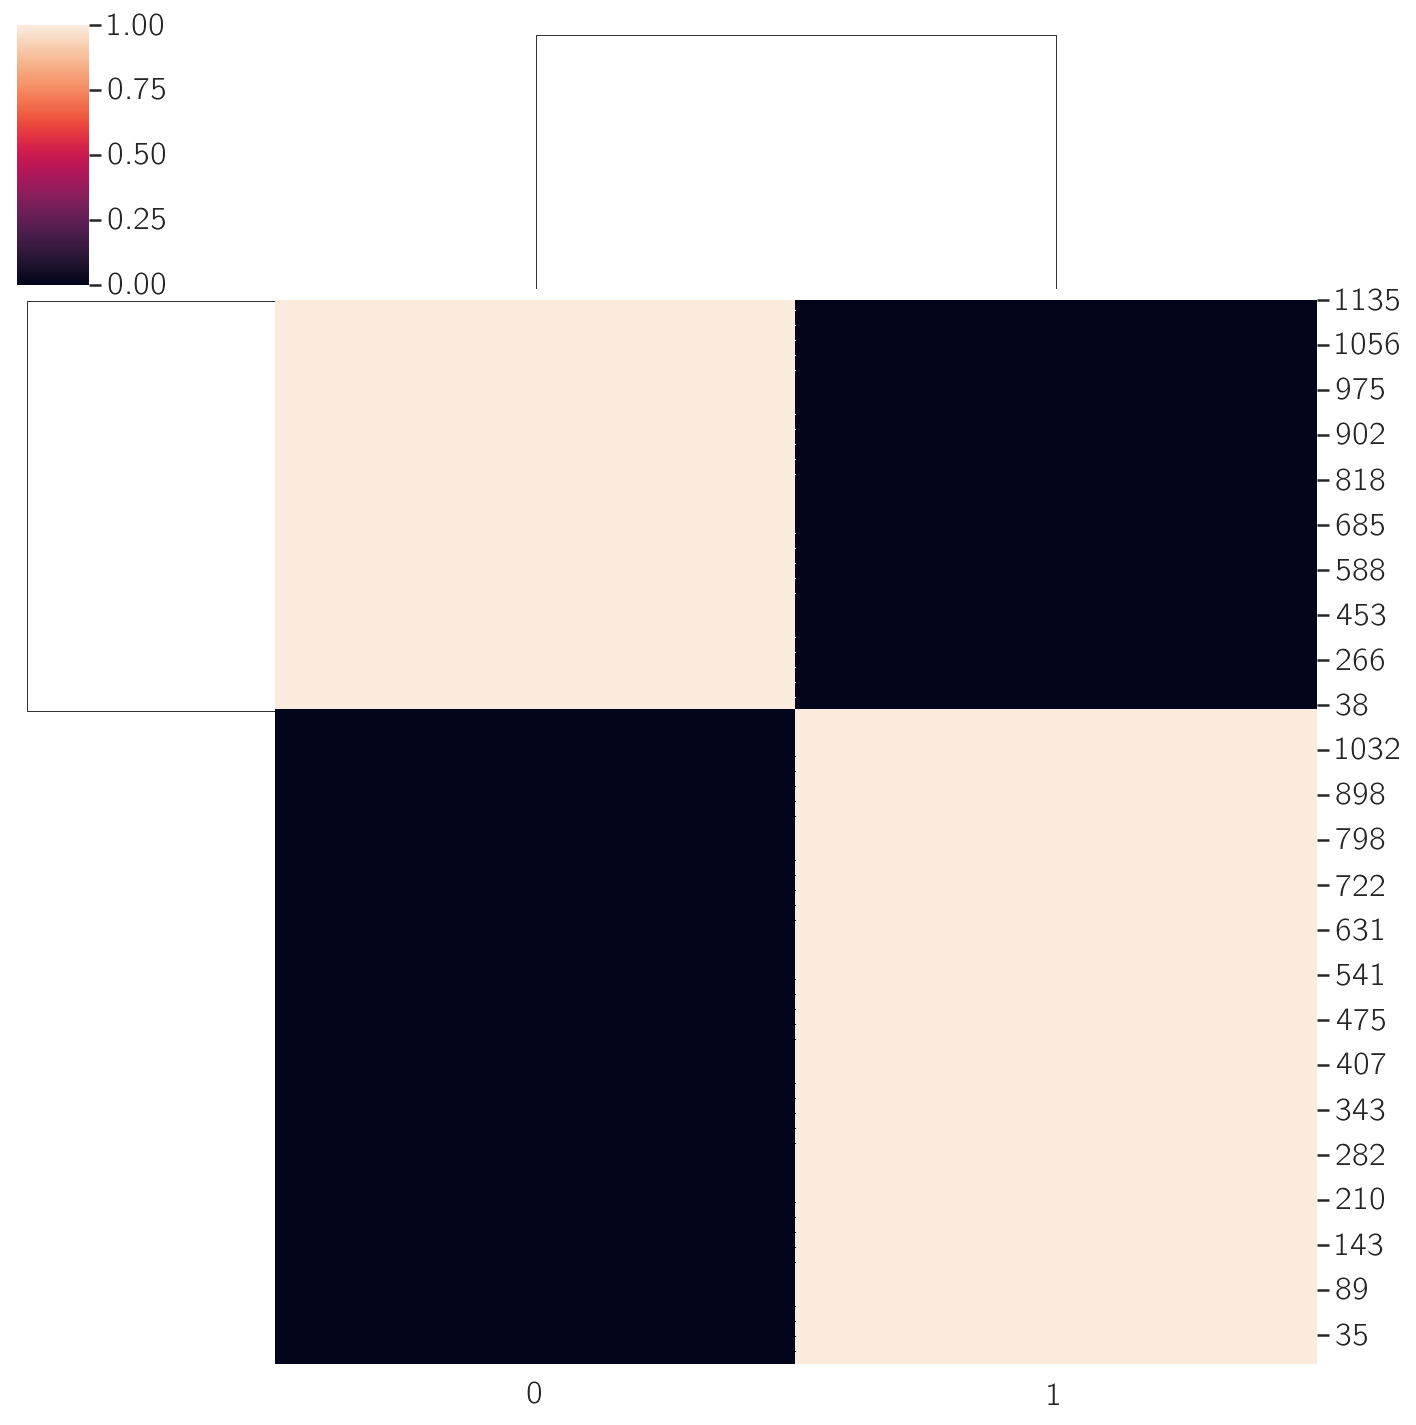

In [15]:
Hprime = H[delta > 0.2]
sns.clustermap(Hprime, standard_scale=0)

(array([1526., 1668., 1606.,  972.,  374.,  133.,   60.,   24.,   12.,
          10.]),
 array([1.65665828e-05, 5.95107070e-02, 1.19004847e-01, 1.78498988e-01,
        2.37993128e-01, 2.97487269e-01, 3.56981409e-01, 4.16475549e-01,
        4.75969690e-01, 5.35463830e-01, 5.94957971e-01]),
 <BarContainer object of 10 artists>)

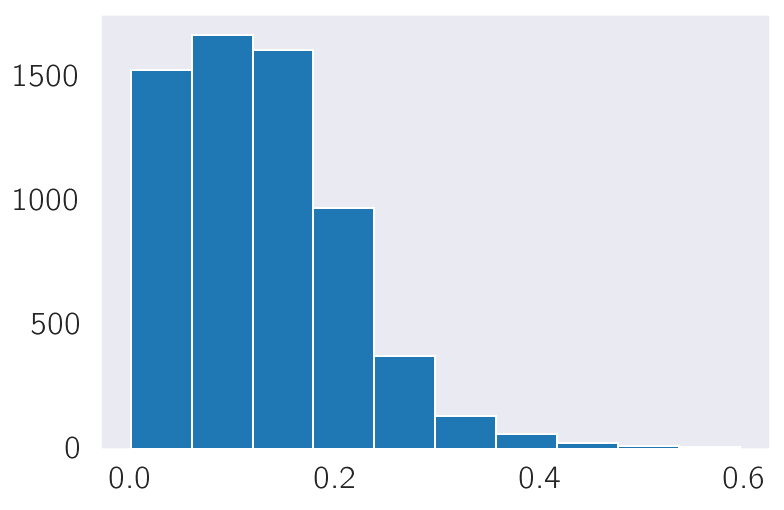

In [14]:
delta = np.abs(H[:, 0] - H[:, 1])
plt.hist(delta.flatten())

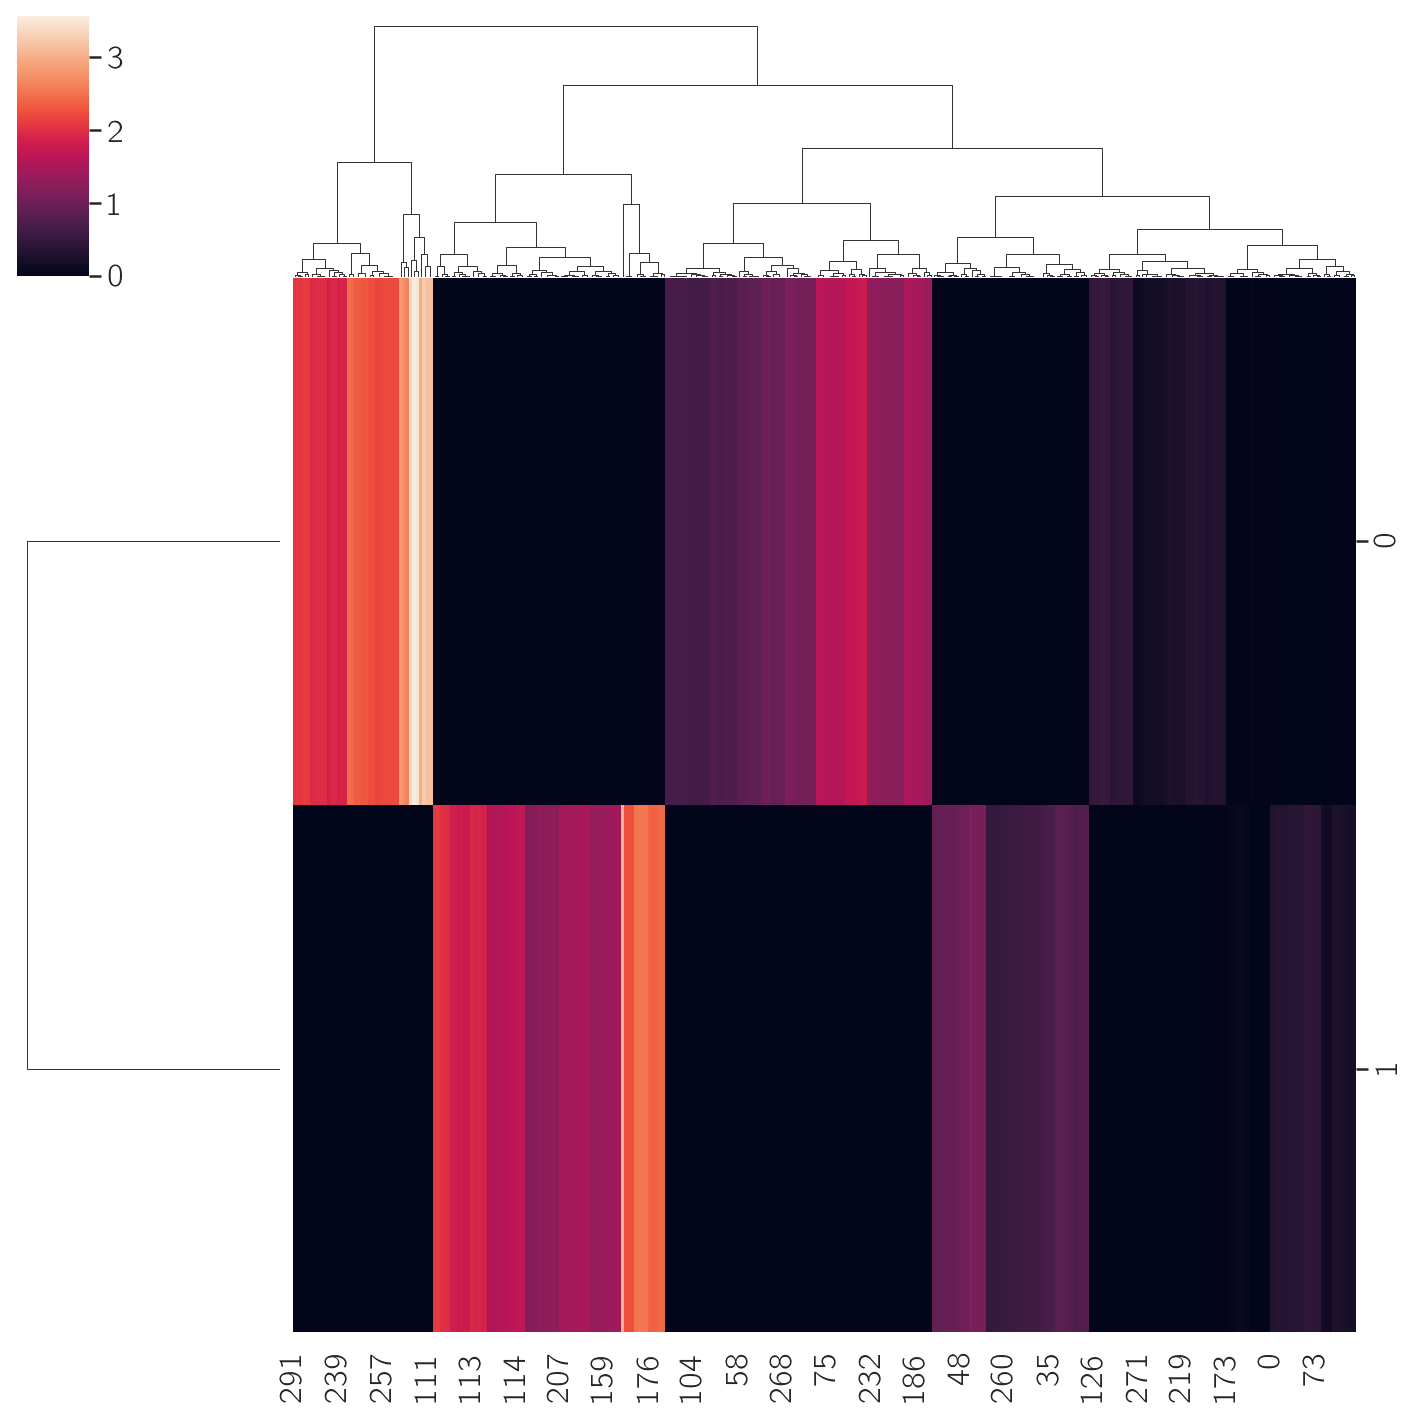

In [16]:
sns.clustermap(nmf.components_ - nmf.components_.min(axis=0)[np.newaxis, :])

In [20]:
meta['classified'] = np.argmax(nmf.components_, axis=0)
label = lambda x: 'Luminal_A' if x == 1 else 'Luminal_B'
meta['class'] = meta.classified.apply(label)
(meta.cancer == meta['class']).sum() / len(meta)

0.6688102893890675

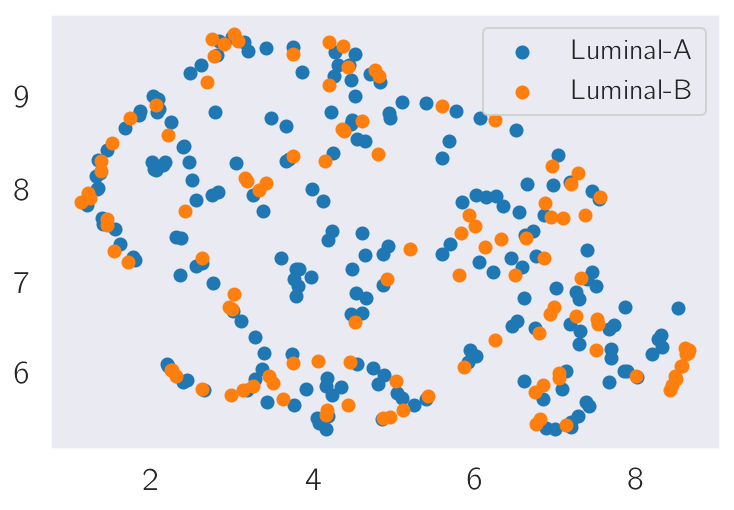

In [23]:
pca = PCA(5)
coords = pca.fit_transform(logdf.T)

fit = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='euclidean')
u = fit.fit_transform(coords)
for name, group in meta.groupby('cancer'):
    idx = group.index.values
    plt.scatter(*u[idx].T, label=name.replace('_', '-'))
plt.legend()

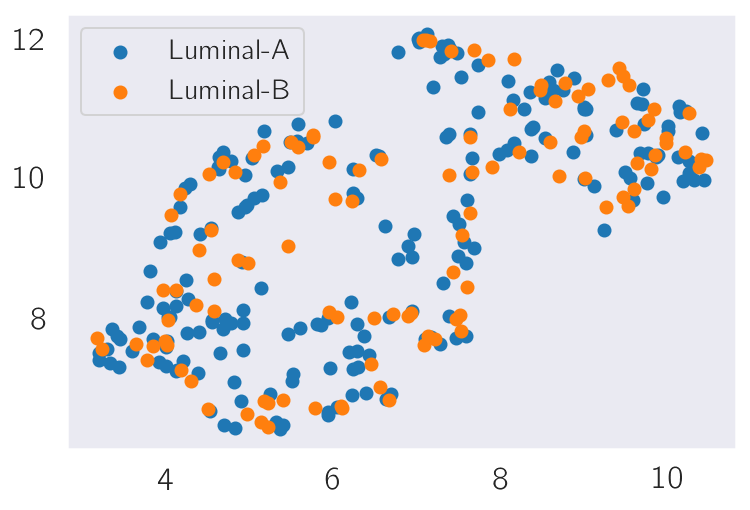

In [25]:
pca = PCA(15)
coords = pca.fit_transform(scaled.T)

fit = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='correlation')
u = fit.fit_transform(coords)

for name, group in meta.groupby('cancer'):
    idx = group.index.values
    plt.scatter(*u[idx].T, label=name.replace('_', '-'))
plt.legend()

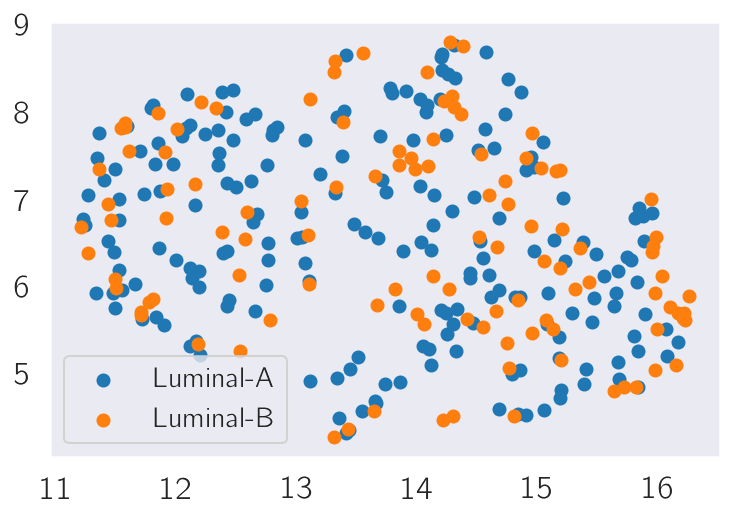

In [26]:
pca = PCA(50)

fit = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='correlation')
u = fit.fit_transform(logdf.T)

for name, group in meta.groupby('cancer'):
    idx = group.index.values
    plt.scatter(*u[idx].T, label=name.replace('_', '-'))
plt.legend()

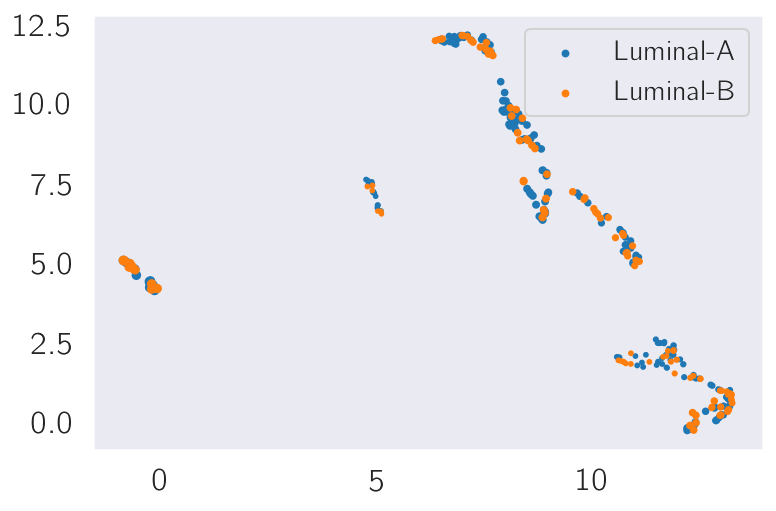

In [28]:
pca = PCA(5)
coords = pca.fit_transform(df.T)

fit = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.01, metric='correlation')
u = fit.fit_transform(coords)

for name, group in meta.groupby('cancer'):
    idx = group.index.values
    plt.scatter(*u[idx].T, label=name.replace('_', '-'))
plt.legend()

In [29]:
pca = PCA(5)
coords = pca.fit_transform(df.T)

fit = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.01, metric='correlation')
u = fit.fit_transform(coords)

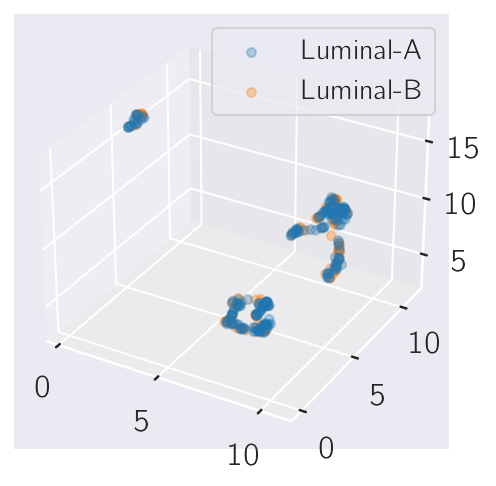

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for name, group in meta.groupby('cancer'):
    idx = group.index.values
    ax.scatter(*u[idx].T, label=name.replace('_', '-'), alpha=0.3)
plt.legend()

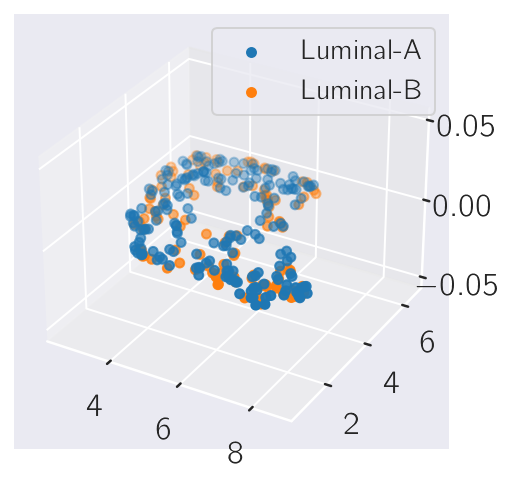

In [33]:
pca = PCA(15)
coords = pca.fit_transform(logdf.T)

fit = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='correlation')
u = fit.fit_transform(coords)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for name, group in meta.groupby('cancer'):
    idx = group.index.values
    ax.scatter(*u[idx].T, label=name.replace('_', '-'))
plt.legend()